# Integrating ND4

In [19]:
import pandas as pd
from tqdm.auto import tqdm 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
import logging
import traceback
import glob
from macrohet import dataio, colours, tools
colours = expanded_piyg = colours.expanded_piyg

In [1]:
acq_ID = (6, 7)

In [61]:
df_acq_ID = pd.read_pickle(f'/mnt/SYNO/macrohet_syno/results/dfs/ND0004/sc_df_{acq_ID[0]}.{acq_ID[1]}.ND0004.pkl')

In [62]:
df_acq_ID

,ID,t,x,y,Mtb Area (µm),Mphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,Unique_ID
0,9,0,2402,952,NaN,NaN,False,False,False,9.6.7.ND0004
1,9,1,2403,937,5.497722,760.249983,True,False,False,9.6.7.ND0004
2,9,2,2399,923,8.112492,1447.264056,True,False,False,9.6.7.ND0004
3,9,3,2407,923,6.503402,415.860183,True,False,False,9.6.7.ND0004
4,9,4,2393,912,5.967039,1338.136516,True,False,False,9.6.7.ND0004
...,...,...,...,...,...,...,...,...,...,...
14457,16539,126,455,5997,NaN,NaN,False,False,True,16539.6.7.ND0004
14458,16539,127,449,6003,0.000000,459.104457,False,False,True,16539.6.7.ND0004
14459,16539,128,408,5976,4.022723,1094.471234,True,False,True,16539.6.7.ND0004
14460,16539,129,394,6021,0.000000,347.920858,False,False,True,16539.6.7.ND0004


### Add in condiotion information

In [63]:
expt_ID = 'ND0004'
base_dir = f'/mnt/SYNO/macrohet_syno/data/{expt_ID}/'
metadata_path = glob.glob(os.path.join(base_dir, 'acquisition/Assaylayout/*.xml'))[0]
assay_layout = dataio.read_harmony_metadata(metadata_path, assay_layout=True,replicate_number=True)# mask_exist=True,  image_dir = image_dir, image_metadata = metadata)

Reading metadata XML file...
Extracting metadata complete!


In [64]:
assay_layout

Strain Compound Concentration ConcentrationEC  Replicate #
Row Column                                                           
3   1         UNI     CTRL             0             EC0            1
    2         UNI     CTRL             0             EC0            2
    3          WT     CTRL             0             EC0            1
    4          WT     CTRL             0             EC0            2
    5          WT      PZA            60            EC50            1
    6          WT      PZA            60            EC50            2
    7          WT      RIF           0.1            EC50            1
    8          WT      RIF           0.1            EC50            2
    9          WT      INH          0.04            EC50            1
    10         WT      INH          0.04            EC50            2
    11         WT      BDQ          0.02            EC50            1
    12         WT      BDQ          0.02            EC50            2
4   3          WT     CTRL             0             EC0            3
    4          WT     CTRL             0             EC0            4
    5          WT      PZA           400            EC99            1
    6          WT      PZA           400            EC99            2
    7          WT      RIF             2            EC99            1
    8          WT      RIF             2            EC99            2
    9          WT      INH             2            EC99            1
    10         WT      INH             2            EC99            2
    11         WT      BDQ           2.5            EC99            1
    12         WT      BDQ           2.5            EC99            2
5   3         RD1     CTRL             0             EC0            1
    4         RD1     CTRL             0             EC0            2
    5         RD1      PZA            60            EC50            1
    6         RD1      PZA            60            EC50            2
    7         RD1      RIF           0.1            EC50            1
    8         RD1      RIF           0.1            EC50            2
    9         RD1      INH          0.04            EC50            1
    10        RD1      INH          0.04            EC50            2
    11        RD1      BDQ          0.02            EC50            1
    12        RD1      BDQ          0.02            EC50            2
6   3         RD1     CTRL             0             EC0            3
    4         RD1     CTRL             0             EC0            4
    5         RD1      PZA           400            EC99            1
    6         RD1      PZA           400            EC99            2
    7         RD1      RIF             2            EC99            1
    8         RD1      RIF             2            EC99            2
    9         RD1      INH             2            EC99            1
    10        RD1      INH             2            EC99            2
    11        RD1      BDQ           2.5            EC99            1
    12        RD1      BDQ           2.5            EC99            2

In [65]:
df_acq_ID['Strain'] = assay_layout.loc[(acq_ID), 'Strain']
df_acq_ID['Compound'] = assay_layout.loc[(acq_ID), 'Compound']
df_acq_ID['Concentration'] = assay_layout.loc[(acq_ID), 'ConcentrationEC']

### Add various details

In [66]:
df_acq_ID['Time (hours)'] = df_acq_ID['t'] / 2
df_acq_ID['Frame'] = df_acq_ID['t']

In [67]:
df_acq_ID['Cell ID'] = df_acq_ID['ID']
df_acq_ID['ID'] = df_acq_ID['Unique_ID']

In [68]:
df_acq_ID['Acquisition ID'] = [acq_ID for i in range(len(df_acq_ID))]

In [69]:
df_acq_ID['Experiment ID'] = 'ND0004'

In [70]:
df_acq_ID

,ID,t,x,y,Mtb Area (µm),Mphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,Unique_ID,Strain,Compound,Concentration,Time (hours),Frame,Cell ID,Acquisition ID,Experiment ID
0,9.6.7.ND0004,0,2402,952,NaN,NaN,False,False,False,9.6.7.ND0004,RD1,RIF,EC99,0.0,0,9,"(6, 7)",ND0004
1,9.6.7.ND0004,1,2403,937,5.497722,760.249983,True,False,False,9.6.7.ND0004,RD1,RIF,EC99,0.5,1,9,"(6, 7)",ND0004
2,9.6.7.ND0004,2,2399,923,8.112492,1447.264056,True,False,False,9.6.7.ND0004,RD1,RIF,EC99,1.0,2,9,"(6, 7)",ND0004
3,9.6.7.ND0004,3,2407,923,6.503402,415.860183,True,False,False,9.6.7.ND0004,RD1,RIF,EC99,1.5,3,9,"(6, 7)",ND0004
4,9.6.7.ND0004,4,2393,912,5.967039,1338.136516,True,False,False,9.6.7.ND0004,RD1,RIF,EC99,2.0,4,9,"(6, 7)",ND0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14457,16539.6.7.ND0004,126,455,5997,NaN,NaN,False,False,True,16539.6.7.ND0004,RD1,RIF,EC99,63.0,126,16539,"(6, 7)",ND0004
14458,16539.6.7.ND0004,127,449,6003,0.000000,459.104457,False,False,True,16539.6.7.ND0004,RD1,RIF,EC99,63.5,127,16539,"(6, 7)",ND0004
14459,16539.6.7.ND0004,128,408,5976,4.022723,1094.471234,True,False,True,16539.6.7.ND0004,RD1,RIF,EC99,64.0,128,16539,"(6, 7)",ND0004
14460,16539.6.7.ND0004,129,394,6021,0.000000,347.920858,False,False,True,16539.6.7.ND0004,RD1,RIF,EC99,64.5,129,16539,"(6, 7)",ND0004


### Process the mtb signal

In [71]:
window = 10

In [72]:
# Iterate over each unique ID in the DataFrame
for ID in tqdm(df_acq_ID['ID'].unique()):
    # Filter the DataFrame for the current ID
    sc_df = df_acq_ID[df_acq_ID['ID'] == ID].copy()
    
    df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Mtb Area Processed (µm)'] =  sc_df['Mtb Area (µm)'].interpolate(method='linear').interpolate(method='backfill').rolling(window=window).median().values

  0%|          | 0/127 [00:00<?, ?it/s]

/tmp/ipykernel_10817/526970481.py:6: FutureWarning: Series.interpolate with method=backfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Mtb Area Processed (µm)'] =  sc_df['Mtb Area (µm)'].interpolate(method='linear').interpolate(method='backfill').rolling(window=window).median().values
/tmp/ipykernel_10817/526970481.py:6: FutureWarning: Series.interpolate with method=backfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Mtb Area Processed (µm)'] =  sc_df['Mtb Area (µm)'].interpolate(method='linear').interpolate(method='backfill').rolling(window=window).median().values
/tmp/ipykernel_10817/526970481.py:6: FutureWarning: Series.interpolate with method=backfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Mtb Area Processed (µm)'] =  sc_

### Calculate a growth model for each trajectory based on the processed signal 

In [73]:
# Iterate over each unique ID in the DataFrame
for ID in tqdm(df_acq_ID['ID'].unique()):
    # Filter the DataFrame for the current ID
    sc_df = df_acq_ID[df_acq_ID['ID'] == ID].copy()
    
    # Determine the window size based on the ID
    window = 5 if 'PS0000' in ID else 10
    
    # Extract time points and bacterial population values
    time_points = sc_df['Time (hours)'].values
    bacterial_population = sc_df['Mtb Area Processed (µm)'].values
    
    # Fit the population model using LOWESS
    model = sm.nonparametric.lowess(endog=bacterial_population, exog=time_points, frac=0.25)
    time_model = model[:, 0] -(window / 2) + 0.5 ## shifting the time model back to account for the shift from rolling average
    population_model = np.clip(model[:, 1], 0, None) # clipping any population models above 0

    if len(sc_df) < len(population_model):
        print('trouble with', ID)
        break
    # Padding population_model with NaNs if it is shorter than sc_df
    if len(sc_df) > len(population_model):
        length_diff = len(sc_df) - len(population_model)
        pad_front = length_diff // 2
        pad_end = length_diff - pad_front
        
        population_model = np.concatenate([
            np.full(pad_front, np.nan),
            population_model,
            np.full(pad_end, np.nan)
        ])
        
        time_model = np.concatenate([
            np.full(pad_front, np.nan),
            time_model,
            np.full(pad_end, np.nan)
        ])

    # Add the new columns to the original DataFrame for this specific ID
    df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Time Model (hours)'] = time_model
    df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Mtb Area Model (µm)'] = population_model

  0%|          | 0/127 [00:00<?, ?it/s]

In [74]:
df_acq_ID

,ID,t,x,y,Mtb Area (µm),Mphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,Unique_ID,...,Compound,Concentration,Time (hours),Frame,Cell ID,Acquisition ID,Experiment ID,Mtb Area Processed (µm),Time Model (hours),Mtb Area Model (µm)
0,9.6.7.ND0004,0,2402,952,NaN,NaN,False,False,False,9.6.7.ND0004,...,RIF,EC99,0.0,0,9,"(6, 7)",ND0004,NaN,NaN,NaN
1,9.6.7.ND0004,1,2403,937,5.497722,760.249983,True,False,False,9.6.7.ND0004,...,RIF,EC99,0.5,1,9,"(6, 7)",ND0004,NaN,NaN,NaN
2,9.6.7.ND0004,2,2399,923,8.112492,1447.264056,True,False,False,9.6.7.ND0004,...,RIF,EC99,1.0,2,9,"(6, 7)",ND0004,NaN,NaN,NaN
3,9.6.7.ND0004,3,2407,923,6.503402,415.860183,True,False,False,9.6.7.ND0004,...,RIF,EC99,1.5,3,9,"(6, 7)",ND0004,NaN,NaN,NaN
4,9.6.7.ND0004,4,2393,912,5.967039,1338.136516,True,False,False,9.6.7.ND0004,...,RIF,EC99,2.0,4,9,"(6, 7)",ND0004,NaN,0.0,6.105074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14457,16539.6.7.ND0004,126,455,5997,NaN,NaN,False,False,True,16539.6.7.ND0004,...,RIF,EC99,63.0,126,16539,"(6, 7)",ND0004,0.0,NaN,NaN
14458,16539.6.7.ND0004,127,449,6003,0.000000,459.104457,False,False,True,16539.6.7.ND0004,...,RIF,EC99,63.5,127,16539,"(6, 7)",ND0004,0.0,NaN,NaN
14459,16539.6.7.ND0004,128,408,5976,4.022723,1094.471234,True,False,True,16539.6.7.ND0004,...,RIF,EC99,64.0,128,16539,"(6, 7)",ND0004,0.0,NaN,NaN
14460,16539.6.7.ND0004,129,394,6021,0.000000,347.920858,False,False,True,16539.6.7.ND0004,...,RIF,EC99,64.5,129,16539,"(6, 7)",ND0004,0.0,NaN,NaN


### Add infection status

In [75]:
# Apply the function to each group
df_acq_ID = df_acq_ID.groupby('ID').apply(tools.mark_infection_status)

/tmp/ipykernel_10817/624102987.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_acq_ID = df_acq_ID.groupby('ID').apply(tools.mark_infection_status)


In [77]:
df_acq_ID

ID    t     x     y  Mtb Area (µm)  \
ID                                                                         
10009.6.7.ND0004 10438  10009.6.7.ND0004   22  5349  2139      38.618142   
                 10439  10009.6.7.ND0004   23  5334  2087            NaN   
                 10440  10009.6.7.ND0004   24  5258  2079       0.000000   
                 10441  10009.6.7.ND0004   25  5308  2070      38.886324   
                 10442  10009.6.7.ND0004   26  5306  2126      38.037082   
...                                  ...  ...   ...   ...            ...   
999.6.7.ND0004   1725     999.6.7.ND0004  149  2145  1460       0.000000   
                 1726     999.6.7.ND0004  150  2152  1465       0.000000   
                 1727     999.6.7.ND0004  151  2152  1469       0.000000   
                 1728     999.6.7.ND0004  152  2141  1471       0.000000   
                 1729     999.6.7.ND0004  153  2147  1469       0.000000   

                        Mphi Area (µm) Infection Status  \
ID                                                        
10009.6.7.ND0004 10438     3622.775098              NaN   
                 10439             NaN              NaN   
                 10440      787.492759              NaN   
                 10441     3313.159504              NaN   
                 10442     3562.054327            False   
...                                ...              ...   
999.6.7.ND0004   1725       422.006010              NaN   
                 1726       405.222315              NaN   
                 1727       472.737019              NaN   
                 1728       484.022992              NaN   
                 1729       443.974548              NaN   

                        Initial Infection Status  Final Infection Status  \
ID                                                                         
10009.6.7.ND0004 10438                     False                   False   
                 10439                     False                   False   
                 10440                     False                   False   
                 10441                     False                   False   
                 10442                     False                   False   
...                                          ...                     ...   
999.6.7.ND0004   1725                      False                   False   
                 1726                      False                   False   
                 1727                      False                   False   
                 1728                      False                   False   
                 1729                      False                   False   

                               Unique_ID  ... Compound Concentration  \
ID                                        ...                          
10009.6.7.ND0004 10438  10009.6.7.ND0004  ...      RIF          EC99   
                 10439  10009.6.7.ND0004  ...      RIF          EC99   
                 10440  10009.6.7.ND0004  ...      RIF          EC99   
                 10441  10009.6.7.ND0004  ...      RIF          EC99   
                 10442  10009.6.7.ND0004  ...      RIF          EC99   
...                                  ...  ...      ...           ...   
999.6.7.ND0004   1725     999.6.7.ND0004  ...      RIF          EC99   
                 1726     999.6.7.ND0004  ...      RIF          EC99   
                 1727     999.6.7.ND0004  ...      RIF          EC99   
                 1728     999.6.7.ND0004  ...      RIF          EC99   
                 1729     999.6.7.ND0004  ...      RIF          EC99   

                       Time (hours)  Frame  Cell ID  Acquisition ID  \
ID                                                                    
10009.6.7.ND0004 10438         11.0     22    10009          (6, 7)   
                 10439         11.5     23    10009          (6, 7)   
                 10440         12.0     24    10009          (6, 7)   


### Iteratively calculate the doubling times from the processed Mtb model 

In [78]:
output_dir = '/mnt/SYNO/macrohet_syno/results/glimpse_dt_graphs/ND4_graphs_trackastra/'#/mnt/DATA/macrohet/results/preliminary_sc_measures/cumulative_sc_plots/thresholded_480/'#'/Users/dayn/data/macrohet_mac/temp_results/'#
ill_fitting_curves = {}
non_doubling_curves = []

  0%|          | 0/127 [00:00<?, ?it/s]

Nee fitting (-0.06)
Nee fitting (-0.07)
No population doubling for ID 10151.6.7.ND0004
Nee fitting (0.62)
Nee fitting (0.52)
Nee fitting (0.14)
Nee fitting (0.11)
Nee fitting (0.43)
Nee fitting (0.24)
Nee fitting (-0.11)
Nee fitting (0.36)
No population doubling for ID 11143.6.7.ND0004
No population doubling for ID 11143.6.7.ND0004
Nee fitting (0.4)
Nee fitting (-0.03)
Nee fitting (-0.42)
No population doubling for ID 11366.6.7.ND0004
No population doubling for ID 11366.6.7.ND0004
Nee fitting (0.53)
Nee fitting (-0.08)
Nee fitting (-0.32)
No population doubling for ID 12553.6.7.ND0004
Nee fitting (0.17)
Nee fitting (0.6)
Nee fitting (-1.98)
Nee fitting (-0.38)
Nee fitting (0.19)
Nee fitting (0.57)
Nee fitting (0.01)
Nee fitting (0.28)
Nee fitting (0.52)
Nee fitting (0.1)
Nee fitting (0.63)
Nee fitting (0.68)
Nee fitting (0.6)
No population doubling for ID 14438.6.7.ND0004
No population doubling for ID 14438.6.7.ND0004
Nee fitting (0.41)
Nee fitting (0.27)
Nee fitting (0.07)
Nee fitting

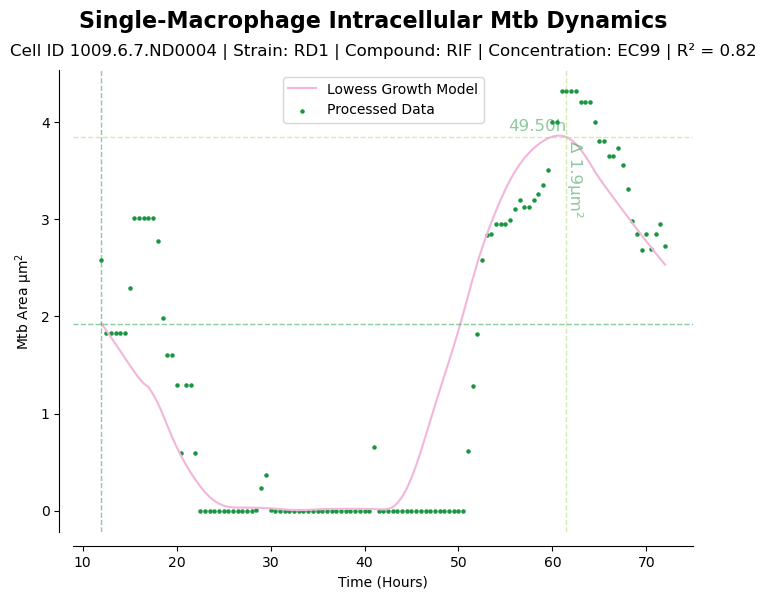

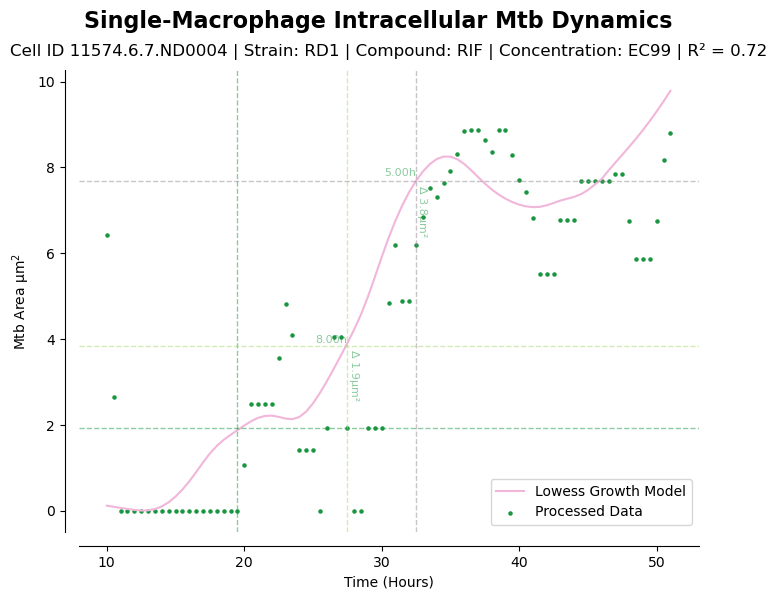

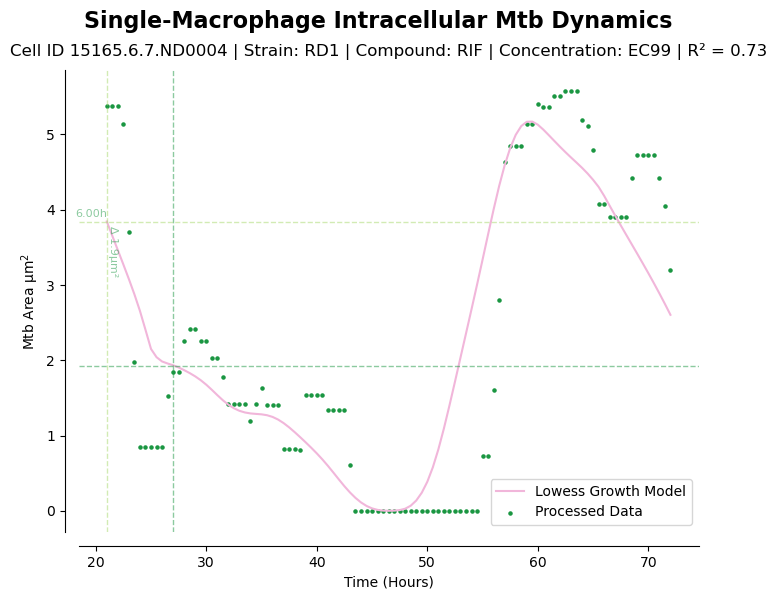

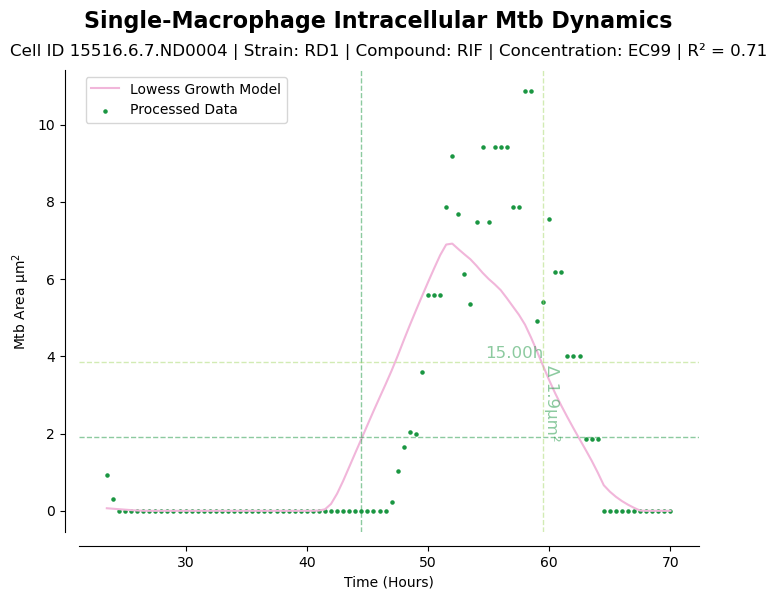

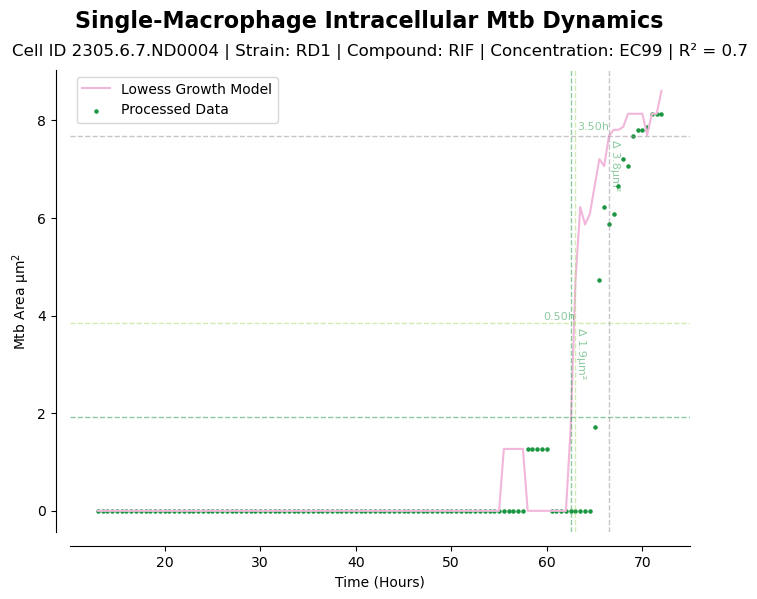

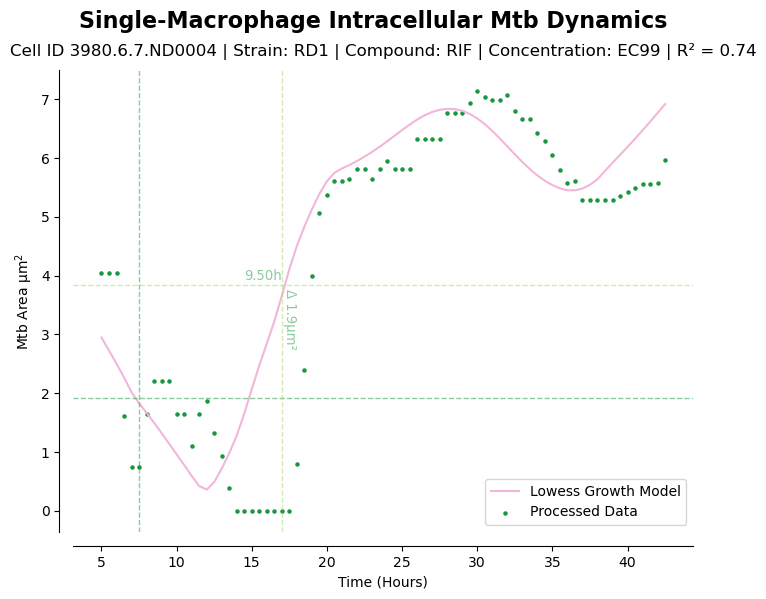

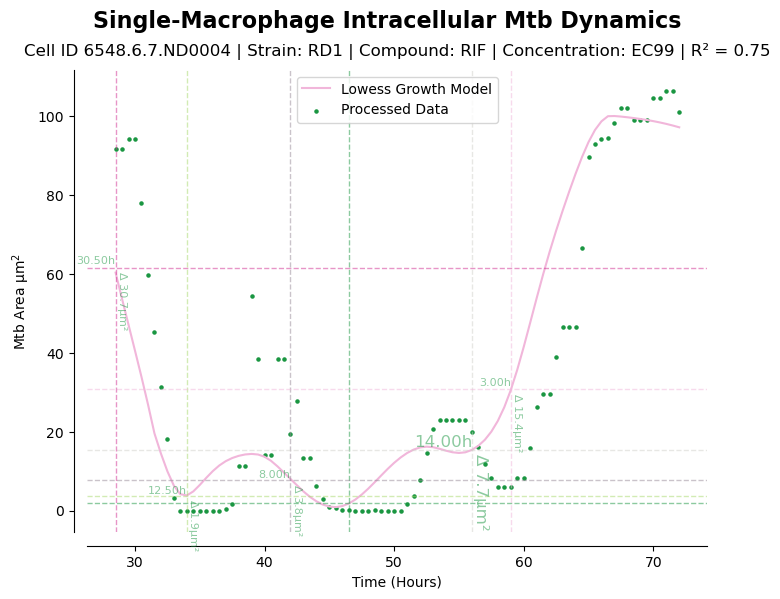

In [79]:
N = 0
for ID in tqdm(df_acq_ID['ID'].unique()):
    try:
        # Get single-cell trajectory in df format
        sc_df = df_acq_ID[df_acq_ID['ID'] == ID]
        # Drop NaN values specifically from the required columns
        sc_df = sc_df.dropna(subset=['Time Model (hours)', 'Mtb Area Model (µm)', 'Mtb Area Processed (µm)'])
        # Ensure there is temporal order
        sc_df = sc_df.sort_values(by='Time Model (hours)')
        
        # Extract Strain, Compound, and Concentration for the title
        strain, compound, concentration = sc_df[['Strain', 'Compound', 'Concentration']].iloc[0].values
        
        # Calculate the R2 value and skip plotting if R2 < 0.7
        r2 = round(r2_score(sc_df['Mtb Area Processed (µm)'], sc_df['Mtb Area Model (µm)']), 2)
        df_acq_ID.loc[df_acq_ID['ID'] == ID, 'r2'] = r2
        if r2 < 0.7:
            ill_fitting_curves[ID] = r2
            df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Doubling Amounts'] = None
            df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Doubling Times'] = None
            print(f'Nee fitting ({r2})')
            continue
        
        # Find the temporal order of the minimum and maximum
        min_value = max(sc_df['Mtb Area Model (µm)'].round(1).min(), 1.92) # has to be above the minimum threshold
        max_value = sc_df['Mtb Area Model (µm)'].round(1).max()
        
        # perform a check on the data
        if max_value <= min_value:
            non_doubling_curves.append(ID)
            print(f'No population doubling for ID {ID}')
        
        # Find the time indices of the minimum and maximum
        min_index = sc_df['Mtb Area Model (µm)'].round(1).idxmin()
        max_index = sc_df['Mtb Area Model (µm)'].round(1).idxmax()
        
        # Check if maximum occurs before minimum
        if max_index > min_index:
            growth = True
            # Minimum occurs before the maximum (indicating growth)
            # Start from the minimum and double
            N_i = min_value
            N_series = []
            
            # Generate the doubling series
            while N_i <= max_value:
                N_series.append(N_i)
                N_i *= 2
            
        else:
            growth = False
            non_doubling_curves.append(ID)
            print(f'No population doubling for ID {ID}')
            df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Doubling Amounts'] = None
            df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Doubling Times'] = None
            continue
            # Maximum occurs before the minimum (indicating a reduction)
            # Start from the maximum and halve
            # N_i = max_value
            # N_series = []
            
            # # Generate the halving series
            # while N_i >= min_value:
            #     N_series.append(N_i)
            #     N_i /= 2
        
        
        # Check if there are no valid doubling points
        if len(N_series) < 2:
            non_doubling_curves.append(ID)
            print(f'No population doubling for ID {ID}')
            df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Doubling Amounts'] = None
            df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Doubling Times'] = None
            continue
            
        # Find the indices and corresponding times for each doubling point
        doubling_time_indices = np.clip(np.searchsorted(sc_df['Mtb Area Model (µm)'], N_series), 0, len(sc_df) - 1)
        doubling_time_indices = [np.abs(sc_df['Mtb Area Model (µm)'] - value).idxmin() for value in N_series]
        doubling_time_points = sc_df['Time Model (hours)'].loc[doubling_time_indices]
        doubling_times = doubling_time_points.diff().dropna().values.tolist()
        
        if not growth:
            doubling_times = [-t for t in doubling_times]
            N_series = [-n for n in N_series]  
        
        # Incorporate N_series and doubling_times into the main DataFrame
        # Assign lists to all entries in df with the same ID
        df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Doubling Amounts'] = df_acq_ID.loc[df_acq_ID['ID'] == ID].apply(lambda x: N_series, axis=1)
        df_acq_ID.loc[df_acq_ID['ID'] == ID, 'Doubling Times'] = df_acq_ID.loc[df_acq_ID['ID'] == ID].apply(lambda x: doubling_times, axis=1)
        # df.to_pickle('/mnt/SYNO/macrohet_syno/results/dfs/dt_df_v2.pkl')
            
        # Plot the experimental data and the fitted model
        plt.figure(figsize=(8, 6))
        plt.plot(sc_df['Time Model (hours)'], sc_df['Mtb Area Model (µm)'], label='Lowess Growth Model', color=colours[-2])
        plt.scatter(sc_df['Time Model (hours)'], sc_df['Mtb Area Processed (µm)'], label='Processed Data', color=colours[0], s=5)
        
        # Annotate doubling times and draw faint lines
        for i, (time, population) in enumerate(zip(doubling_time_points, N_series)):
            time = abs(time)
            population = abs(population)
            color_index = i % len(expanded_piyg)  # This ensures the color index wraps around
            # Draw faint vertical lines at doubling time points
            plt.axvline(x=time, color=expanded_piyg[color_index], linestyle='--', linewidth=1, alpha=0.5)
            plt.axhline(y=population, color=expanded_piyg[color_index], linestyle='--', linewidth=1, alpha=0.5)
            
            # Place a text label indicating the doubling time
            if i > 0:  # Start labeling from the second point
                previous_time = doubling_time_points.iloc[i-1]
                
                # Midpoint between the two lines
                label_x_pos = time  # Correct the label position
                # Adjust y-position to place the label just above the horizontal line
                label_y_pos = population + (population * 0.01)  # Slightly above the horizontal line
        
                # Calculate the gap between the lines and scale the font size
                gap = time - previous_time
                scaled_fontsize = max(8, min(12, gap))  # Scale font size within a reasonable range (e.g., 8 to 12)
                
                # Draw the horizontal doubling time label
                plt.text(label_x_pos, label_y_pos, f'{abs(doubling_times[i-1]):.2f}h', 
                         ha='right', va='bottom', alpha=0.5, fontsize=scaled_fontsize, color=expanded_piyg[0])
                
                # Draw vertical arrow showing the change in N_series (doubling amount)
                deltaMtb = population - N_series[i-1]
                
                # Midpoint for the vertical delta annotation
                text_y_pos = (population + N_series[i-1]) / 2  # Midway between current and previous population
                text_x_pos = (population + N_series[i-1]) / 2  # Midway between current and previous population
        
                # Midpoint between the two lines
                label_x_pos = time + 0.1  # Adjust x-position
                # Adjust y-position to place the label just above the horizontal line
                label_y_pos = population - (max_value * 0.01)
                
                # Place the vertical label using plt.text
                plt.text(label_x_pos, label_y_pos, f'Δ {abs(deltaMtb):.1f}µm²',
                         fontsize=scaled_fontsize, color=expanded_piyg[0], ha='left', va='top', rotation=270, alpha=0.5)
        
        # Add labels, legend, and titles
        plt.xlabel('Time (Hours)')
        plt.ylabel('Mtb Area µm$^{2}$')
        plt.legend()
        # Main title
        plt.suptitle('Single-Macrophage Intracellular Mtb Dynamics', 
                     weight='bold', fontsize=16)
        # Subtitle
        plt.title(f'Cell ID {ID} | Strain: {strain} | Compound: {compound} | Concentration: {concentration} | R² = {r2}', fontsize=12, pad=10)
        
        sns.despine(offset=10)
        plt.grid(False)
        
        plt.savefig(os.path.join(output_dir, f'{ID}_dtmin{np.min(doubling_times)}_r2{r2}_graph.pdf'), bbox_inches = 'tight', dpi = 314)
        plt.close
        N+=1
    
    except Exception as e:
        # Log the exception with traceback
        logging.error(f"Error while processing ID {ID}: {e}")
        logging.error(traceback.format_exc())
        print(f"An error occurred while processing ID {ID}. Check error_log.log for details.")

# Checking with glimpses

In [200]:
import os
import numpy as np
import pandas as pd
import zarr
import glob
import btrack
import cv2
from PIL import Image, ImageDraw, ImageFont
from tqdm.auto import tqdm

In [201]:
N_skipped = 0
N_processed = 0
side_length = False

In [202]:
# Prepare font and color settings
font_path = "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf"  # Update this path to your font file
font = ImageFont.truetype(font_path, 42)
text_color = (0, 255, 255)  # Yellow color in RGB format
# Define the side length
side_length = 750
# and other image properties
track_scale_factor = 1 # 5.04
image_scale_m_per_pixel = 1.4949402023919043e-07
image_scale_um_per_pixel = image_scale_m_per_pixel*1E6
image_width = image_height = 6048
last_seg_fn = []

In [203]:
output_dir

'/mnt/SYNO/macrohet_syno/results/glimpse_dt_graphs/ND4_graphs_trackastra/'

In [204]:
for unique_ID in tqdm(df_acq_ID['ID'].unique(), total = len(df_acq_ID['ID'].unique())):
    
    # try: 
    # if 'ND0003' not in unique_ID:
    #     continue
    # if os.path.exists(f"/mnt/SYNO/macrohet_syno/results/glimpse_dt_graphs/ND4_newmodel_glimpses/{unique_ID}.mp4"):
    # # if os.path.exists(f"/mnt/SYNO/macrohet_syno/data/glimpses/{unique_ID}.mp4"):
    #     print(f'Path exists {unique_ID}')
    #     continue 
        
    sc_df = df_acq_ID[df_acq_ID['ID'] == unique_ID]
    r2 = sc_df['r2'].iloc[0]
    if r2 < 0.7:
        print(f'Skipping ID {unique_ID} as r2 = {r2}')
        N_skipped += 1
        continue

    N_processed +=1
    
    # get the acq id information
    acq_ID = row, column = int(unique_ID.split('.')[1]), int(unique_ID.split('.')[2]) 
    cell_ID = int(unique_ID.split('.')[0])
    expt_ID = unique_ID.split('.')[-1]
    
    # assign the proper channel enumeration
    mphi_channel = 0 if expt_ID == 'PS0000' else 1
    mtb_channel = 1 if expt_ID == 'PS0000' else 0
    
    # if no side length provided then estimate based on max mphi area
    if not side_length:
        # Calculate the side length for cropping based on the square root of the area
        side_length = int(np.sqrt(sc_df['Mphi Area (µm)'].max())) * 2
    
    # preload the images
    image_dir = f'/mnt/SYNO/macrohet_syno/data/{expt_ID}/acquisition/zarr/{acq_ID}.zarr'
    zarr_group = zarr.open(image_dir, mode='r')
    images = zarr_group.images
    sample_image = images[0,0,0,...]
    
    
    # Load segmentation if necessary
    seg_fn = glob.glob(f'/mnt/SYNO/macrohet_syno/data/{expt_ID}/labels/*/{acq_ID}.h5')[0]
    if seg_fn != last_seg_fn:
        with btrack.io.HDF5FileHandler(seg_fn, 'r', obj_type='obj_type_1') as reader:
            segmentation = reader.segmentation
        last_seg_fn = seg_fn
    
    # load the segmentation 
    rgb_stack = []
    
    # iterate over each frame/data point
    for i, t in tqdm(enumerate(sc_df['Time (hours)']), total = len(sc_df), leave = False, desc = f'Creating glimpse {unique_ID}'):
        
        sc_df_t = sc_df[sc_df['Time (hours)'] == t]
        # Extract xy coordinates and transpose for python and area from the cell information
        x_coord, y_coord, area, t, f, mtb = sc_df_t.loc[:, ['x', 'y', 'Mphi Area (µm)', 'Time (hours)', 'Frame', 'Mtb Area (µm)']].values[0]
    
        # Scale according to tracking shrinkage
        y_coord, x_coord = y_coord * track_scale_factor, x_coord * track_scale_factor
    
        # Calculate the cropping boundaries
        x_start = int(x_coord - side_length / 2)
        x_end = int(x_coord + side_length / 2)
        y_start = int(y_coord - side_length / 2)
        y_end = int(y_coord + side_length / 2)
        
        # Pad the boundaries if they exceed the image dimensions
        if x_start < 0:
            x_pad = abs(x_start)
            x_start = 0
        else:
            x_pad = 0
    
        if x_end > sample_image.shape[0]:
            x_pad_end = x_end - sample_image.shape[0]
            x_end = sample_image.shape[0]
        else:
            x_pad_end = 0
    
        if y_start < 0:
            y_pad = abs(y_start)
            y_start = 0
        else:
            y_pad = 0
    
        if y_end > sample_image.shape[1]:
            y_pad_end = y_end - sample_image.shape[1]
            y_end = sample_image.shape[1]
        else:
            y_pad_end = 0
    
        # Crop the image
        cropped_image = images[int(f), :, 0, x_start:x_end, y_start:y_end]
    
        # Pad the cropped image if necessary
        cropped_image = np.pad(cropped_image, ((0, 0), (x_pad, x_pad_end), (y_pad, y_pad_end)), mode='constant')
        
        # extract the gfp and rfp channels to apply some vis techn
        gfp = cropped_image[mphi_channel, ...]
        rfp = cropped_image[mtb_channel, ...]
        
        # clip the images so that the contrast is more apparent
        contrast_lim_gfp = np.clip(gfp, 358, 5886)
        contrast_lim_rfp = np.clip(rfp, 480, 1300)
        
        norm_gfp = cv2.normalize(contrast_lim_gfp, None, 0, 65535, cv2.NORM_MINMAX, dtype=cv2.CV_16U)
        norm_rfp = cv2.normalize(contrast_lim_rfp, None, 0, 65535, cv2.NORM_MINMAX, dtype=cv2.CV_16U)
        
        # Create an empty RGB image with the same shape as the input image
        rgb_image = np.zeros((contrast_lim_gfp.shape[0], contrast_lim_gfp.shape[1], 3), dtype=np.uint16)
        
        # Assign the first channel to the green channel of the RGB image
        rgb_image[..., 1] = norm_gfp
        
        # Assign the second channel to the red and blue channels of the RGB image to create magenta
        rgb_image[..., 0] = norm_rfp
        rgb_image[..., 2] = norm_rfp
        
        # scale down to 8bit
        rgb_image = np.uint8(rgb_image >> 8)
    
        
        # load mask (singular)
        cropped_masks = segmentation[int(f), x_start:x_end, y_start:y_end]
        
        # Pad the cropped image if necessary
        cropped_masks = np.pad(cropped_masks, ((x_pad, x_pad_end), (y_pad, y_pad_end)), mode='constant')
    
        # extract only that segment
        seg_ID = cropped_masks[int(cropped_masks.shape[0] / 2), int(cropped_masks.shape[1] / 2)]
       
        if seg_ID == 0:
            instance_mask = np.zeros((side_length, side_length), dtype = np.uint8)
        else:
            instance_mask = (cropped_masks == seg_ID).astype(np.uint8)
    
        # draw outline
        contours, _ = cv2.findContours(instance_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(rgb_image, contours, -1, (0, 2 ** 8, 2 ** 8), thickness=2)  # make 8bit
        
        # Convert to PIL image for text overlay
        pil_image = Image.fromarray(rgb_image)
        draw = ImageDraw.Draw(pil_image)
    
        # Bottom left corner text
        bottom_left_text = f"{t} hours"
        draw.text((10, rgb_image.shape[0] - 80), bottom_left_text, font=font, fill=text_color)
    
        # Bottom right corner text
        bottom_right_text = '20µm'
        text_size = font.getbbox(bottom_right_text)
        text_width = text_size[2] - text_size[0]  # Calculate text width
        bottom_right_text_position = (rgb_image.shape[1] - text_width - 40, rgb_image.shape[0] - 80)
        draw.text(bottom_right_text_position, bottom_right_text, font=font, fill=text_color)
    
        # Calculate line length in pixels for a 20 micrometer scale bar
        line_length_pixels = int(20 / image_scale_um_per_pixel)
        line_start = (bottom_right_text_position[0], bottom_right_text_position[1] + 55)
        line_end = (line_start[0] + line_length_pixels, line_start[1])
        draw.line([line_start, line_end], fill=text_color, width=10)
    
        # Top left corner text
        draw.text((10, 10), unique_ID, font=font, fill=text_color)
    
        # Top right corner text
        mtb_value = f"Mtb:{mtb:.2f}µm²"
        text_size = font.getbbox(mtb_value)
        text_width = text_size[2] - text_size[0]  # Calculate text width
        top_right_text_position = (rgb_image.shape[1] - text_width - 10, 10)
        draw.text(top_right_text_position, mtb_value, font=font, fill=text_color)
    
        # Convert back to OpenCV image
        rgb_image = np.array(pil_image)
        
        # Resize image to consistent shape
        rgb_image_resized = cv2.resize(rgb_image, (side_length, side_length), interpolation=cv2.INTER_AREA)

        # add to stack
        rgb_stack.append(rgb_image_resized)

    # compile into array
    rgb_stack = np.stack(rgb_stack, axis = 0)
    
    # Get the dimensions of the first frame
    height, width, _ = rgb_stack[0].shape
    
    # Define the frame rate (number of frames per second)
    frame_rate = len(rgb_stack) / 20  # Total frames divided by total seconds
    output_file = f"/mnt/SYNO/macrohet_syno/results/glimpse_dt_graphs/ND4_newmodel_glimpses/{unique_ID}.mp4"
    # output_file = f"/mnt/SYNO/macrohet_syno/glimpses/{unique_ID}.mp4"
    # Initialize VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_file, fourcc, frame_rate, (width, height))
    
    # Write each frame to the video file
    for frame in rgb_stack:
        out.write(frame)
    
    # Release the VideoWriter object
    out.release()
    
    print(f"Video {unique_ID} saved successfully.")

# except Exception as e:
#     error_message = f"Error: {e}\nUnique ID: {unique_ID}\n"
#     with open("error_log.txt", "a") as file:
#         file.write(error_message)
        

  0%|          | 0/312 [00:00<?, ?it/s]

[INFO][2024/10/28 04:24:08 pm] Opening HDF file: /mnt/SYNO/macrohet_syno/data/ND0004/labels/cpv3/(4, 8).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/SYNO/macrohet_syno/data/ND0004/labels/cpv3/(4, 8).h5...
[INFO][2024/10/28 04:24:46 pm] Loading segmentation (154, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (154, 6048, 6048)
[INFO][2024/10/28 04:24:46 pm] Closing HDF file: /mnt/SYNO/macrohet_syno/data/ND0004/labels/cpv3/(4, 8).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/SYNO/macrohet_syno/data/ND0004/labels/cpv3/(4, 8).h5


Creating glimpse 1015.4.8.ND0004:   0%|          | 0/79 [00:00<?, ?it/s]

Video 1015.4.8.ND0004 saved successfully.
Skipping ID 1029.4.8.ND0004 as r2 = 0.14
Skipping ID 109.4.8.ND0004 as r2 = 0.67


Creating glimpse 1104.4.8.ND0004:   0%|          | 0/95 [00:00<?, ?it/s]

Video 1104.4.8.ND0004 saved successfully.


Creating glimpse 1119.4.8.ND0004:   0%|          | 0/129 [00:00<?, ?it/s]

Video 1119.4.8.ND0004 saved successfully.
Skipping ID 1146.4.8.ND0004 as r2 = 0.65
Skipping ID 1176.4.8.ND0004 as r2 = 0.41
Skipping ID 1181.4.8.ND0004 as r2 = 0.51
Skipping ID 1187.4.8.ND0004 as r2 = 0.15
Skipping ID 1191.4.8.ND0004 as r2 = 0.59
Skipping ID 121.4.8.ND0004 as r2 = 0.16


Creating glimpse 1218.4.8.ND0004:   0%|          | 0/77 [00:00<?, ?it/s]

Video 1218.4.8.ND0004 saved successfully.


Creating glimpse 1255.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 1255.4.8.ND0004 saved successfully.
Skipping ID 1269.4.8.ND0004 as r2 = 0.67
Skipping ID 1275.4.8.ND0004 as r2 = 0.53
Skipping ID 1278.4.8.ND0004 as r2 = 0.56


Creating glimpse 1343.4.8.ND0004:   0%|          | 0/94 [00:00<?, ?it/s]

Video 1343.4.8.ND0004 saved successfully.


Creating glimpse 1351.4.8.ND0004:   0%|          | 0/110 [00:00<?, ?it/s]

Video 1351.4.8.ND0004 saved successfully.
Skipping ID 1352.4.8.ND0004 as r2 = 0.68


Creating glimpse 1365.4.8.ND0004:   0%|          | 0/117 [00:00<?, ?it/s]

Video 1365.4.8.ND0004 saved successfully.
Skipping ID 1383.4.8.ND0004 as r2 = 0.68
Skipping ID 14.4.8.ND0004 as r2 = 0.54
Skipping ID 1410.4.8.ND0004 as r2 = 0.1
Skipping ID 1448.4.8.ND0004 as r2 = 0.67


Creating glimpse 1454.4.8.ND0004:   0%|          | 0/103 [00:00<?, ?it/s]

Video 1454.4.8.ND0004 saved successfully.
Skipping ID 1455.4.8.ND0004 as r2 = 0.63
Skipping ID 1479.4.8.ND0004 as r2 = 0.58
Skipping ID 1482.4.8.ND0004 as r2 = 0.29
Skipping ID 1485.4.8.ND0004 as r2 = 0.11


Creating glimpse 1494.4.8.ND0004:   0%|          | 0/152 [00:00<?, ?it/s]

Video 1494.4.8.ND0004 saved successfully.
Skipping ID 15.4.8.ND0004 as r2 = 0.16
Skipping ID 1537.4.8.ND0004 as r2 = -0.59


Creating glimpse 1548.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 1548.4.8.ND0004 saved successfully.
Skipping ID 156.4.8.ND0004 as r2 = 0.22


Creating glimpse 1562.4.8.ND0004:   0%|          | 0/131 [00:00<?, ?it/s]

Video 1562.4.8.ND0004 saved successfully.
Skipping ID 1566.4.8.ND0004 as r2 = 0.49
Skipping ID 1579.4.8.ND0004 as r2 = -0.07
Skipping ID 1594.4.8.ND0004 as r2 = 0.34


Creating glimpse 1635.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 1635.4.8.ND0004 saved successfully.


Creating glimpse 1636.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 1636.4.8.ND0004 saved successfully.
Skipping ID 1653.4.8.ND0004 as r2 = 0.22
Skipping ID 1673.4.8.ND0004 as r2 = 0.55


Creating glimpse 1674.4.8.ND0004:   0%|          | 0/89 [00:00<?, ?it/s]

Video 1674.4.8.ND0004 saved successfully.
Skipping ID 1684.4.8.ND0004 as r2 = 0.67


Creating glimpse 1685.4.8.ND0004:   0%|          | 0/100 [00:00<?, ?it/s]

Video 1685.4.8.ND0004 saved successfully.
Skipping ID 1690.4.8.ND0004 as r2 = 0.61
Skipping ID 1701.4.8.ND0004 as r2 = 0.53


Creating glimpse 1709.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 1709.4.8.ND0004 saved successfully.
Skipping ID 1714.4.8.ND0004 as r2 = -0.32


Creating glimpse 1722.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 1722.4.8.ND0004 saved successfully.


Creating glimpse 1741.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 1741.4.8.ND0004 saved successfully.
Skipping ID 175.4.8.ND0004 as r2 = 0.56
Skipping ID 1755.4.8.ND0004 as r2 = 0.55


Creating glimpse 1768.4.8.ND0004:   0%|          | 0/99 [00:00<?, ?it/s]

Video 1768.4.8.ND0004 saved successfully.


Creating glimpse 177.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 177.4.8.ND0004 saved successfully.
Skipping ID 178.4.8.ND0004 as r2 = 0.67


Creating glimpse 181.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 181.4.8.ND0004 saved successfully.
Skipping ID 1816.4.8.ND0004 as r2 = 0.67
Skipping ID 1818.4.8.ND0004 as r2 = 0.3
Skipping ID 185.4.8.ND0004 as r2 = 0.2
Skipping ID 186.4.8.ND0004 as r2 = 0.31


Creating glimpse 187.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 187.4.8.ND0004 saved successfully.
Skipping ID 1882.4.8.ND0004 as r2 = -0.09
Skipping ID 189.4.8.ND0004 as r2 = 0.58
Skipping ID 1896.4.8.ND0004 as r2 = 0.44
Skipping ID 1902.4.8.ND0004 as r2 = 0.51
Skipping ID 1903.4.8.ND0004 as r2 = -3.76


Creating glimpse 191.4.8.ND0004:   0%|          | 0/82 [00:00<?, ?it/s]

Video 191.4.8.ND0004 saved successfully.


Creating glimpse 192.4.8.ND0004:   0%|          | 0/140 [00:00<?, ?it/s]

Video 192.4.8.ND0004 saved successfully.
Skipping ID 1925.4.8.ND0004 as r2 = 0.69


Creating glimpse 193.4.8.ND0004:   0%|          | 0/86 [00:00<?, ?it/s]

Video 193.4.8.ND0004 saved successfully.
Skipping ID 1931.4.8.ND0004 as r2 = 0.45
Skipping ID 1956.4.8.ND0004 as r2 = 0.28
Skipping ID 1976.4.8.ND0004 as r2 = 0.58
Skipping ID 1989.4.8.ND0004 as r2 = 0.42
Skipping ID 20.4.8.ND0004 as r2 = -0.09
Skipping ID 2031.4.8.ND0004 as r2 = 0.56


Creating glimpse 2032.4.8.ND0004:   0%|          | 0/133 [00:00<?, ?it/s]

Video 2032.4.8.ND0004 saved successfully.
Skipping ID 2049.4.8.ND0004 as r2 = 0.37


Creating glimpse 2057.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 2057.4.8.ND0004 saved successfully.


Creating glimpse 2061.4.8.ND0004:   0%|          | 0/127 [00:00<?, ?it/s]

Video 2061.4.8.ND0004 saved successfully.


Creating glimpse 2065.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 2065.4.8.ND0004 saved successfully.
Skipping ID 2096.4.8.ND0004 as r2 = 0.15
Skipping ID 2121.4.8.ND0004 as r2 = -1.13
Skipping ID 2127.4.8.ND0004 as r2 = 0.49
Skipping ID 213.4.8.ND0004 as r2 = 0.5
Skipping ID 2174.4.8.ND0004 as r2 = -0.6
Skipping ID 2190.4.8.ND0004 as r2 = 0.25


Creating glimpse 23.4.8.ND0004:   0%|          | 0/113 [00:00<?, ?it/s]

Video 23.4.8.ND0004 saved successfully.
Skipping ID 2331.4.8.ND0004 as r2 = 0.07


Creating glimpse 2334.4.8.ND0004:   0%|          | 0/84 [00:00<?, ?it/s]

Video 2334.4.8.ND0004 saved successfully.
Skipping ID 2348.4.8.ND0004 as r2 = 0.09
Skipping ID 2357.4.8.ND0004 as r2 = 0.43
Skipping ID 236.4.8.ND0004 as r2 = 0.59


Creating glimpse 237.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 237.4.8.ND0004 saved successfully.
Skipping ID 2377.4.8.ND0004 as r2 = -0.06


Creating glimpse 239.4.8.ND0004:   0%|          | 0/86 [00:00<?, ?it/s]

Video 239.4.8.ND0004 saved successfully.
Skipping ID 24.4.8.ND0004 as r2 = 0.57


Creating glimpse 241.4.8.ND0004:   0%|          | 0/84 [00:00<?, ?it/s]

Video 241.4.8.ND0004 saved successfully.
Skipping ID 2412.4.8.ND0004 as r2 = -0.01


Creating glimpse 243.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 243.4.8.ND0004 saved successfully.
Skipping ID 2434.4.8.ND0004 as r2 = 0.35


Creating glimpse 2445.4.8.ND0004:   0%|          | 0/145 [00:00<?, ?it/s]

Video 2445.4.8.ND0004 saved successfully.


Creating glimpse 2451.4.8.ND0004:   0%|          | 0/124 [00:00<?, ?it/s]

Video 2451.4.8.ND0004 saved successfully.
Skipping ID 2454.4.8.ND0004 as r2 = 0.29


Creating glimpse 2479.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 2479.4.8.ND0004 saved successfully.


Creating glimpse 25.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 25.4.8.ND0004 saved successfully.
Skipping ID 2506.4.8.ND0004 as r2 = 0.15
Skipping ID 2515.4.8.ND0004 as r2 = 0.3
Skipping ID 2522.4.8.ND0004 as r2 = 0.31


Creating glimpse 2546.4.8.ND0004:   0%|          | 0/105 [00:00<?, ?it/s]

Video 2546.4.8.ND0004 saved successfully.
Skipping ID 2558.4.8.ND0004 as r2 = 0.28
Skipping ID 2574.4.8.ND0004 as r2 = -0.07
Skipping ID 2591.4.8.ND0004 as r2 = 0.16
Skipping ID 26.4.8.ND0004 as r2 = 0.3
Skipping ID 2649.4.8.ND0004 as r2 = 0.3
Skipping ID 2668.4.8.ND0004 as r2 = 0.2


Creating glimpse 2675.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 2675.4.8.ND0004 saved successfully.
Skipping ID 2732.4.8.ND0004 as r2 = 0.45
Skipping ID 2751.4.8.ND0004 as r2 = 0.41
Skipping ID 2800.4.8.ND0004 as r2 = 0.54
Skipping ID 2814.4.8.ND0004 as r2 = 0.4
Skipping ID 2818.4.8.ND0004 as r2 = 0.38
Skipping ID 2860.4.8.ND0004 as r2 = 0.51


Creating glimpse 2880.4.8.ND0004:   0%|          | 0/121 [00:00<?, ?it/s]

Video 2880.4.8.ND0004 saved successfully.
Skipping ID 29.4.8.ND0004 as r2 = 0.35


Creating glimpse 2908.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 2908.4.8.ND0004 saved successfully.
Skipping ID 2939.4.8.ND0004 as r2 = 0.07


Creating glimpse 2962.4.8.ND0004:   0%|          | 0/94 [00:00<?, ?it/s]

Video 2962.4.8.ND0004 saved successfully.
Skipping ID 2988.4.8.ND0004 as r2 = -0.01


Creating glimpse 304.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 304.4.8.ND0004 saved successfully.


Creating glimpse 305.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 305.4.8.ND0004 saved successfully.
Skipping ID 307.4.8.ND0004 as r2 = 0.53
Skipping ID 3071.4.8.ND0004 as r2 = 0.61
Skipping ID 3078.4.8.ND0004 as r2 = 0.65


Creating glimpse 3098.4.8.ND0004:   0%|          | 0/109 [00:00<?, ?it/s]

Video 3098.4.8.ND0004 saved successfully.
Skipping ID 311.4.8.ND0004 as r2 = 0.03
Skipping ID 3135.4.8.ND0004 as r2 = 0.61
Skipping ID 3160.4.8.ND0004 as r2 = 0.5
Skipping ID 3167.4.8.ND0004 as r2 = 0.42


Creating glimpse 3195.4.8.ND0004:   0%|          | 0/106 [00:00<?, ?it/s]

Video 3195.4.8.ND0004 saved successfully.
Skipping ID 33.4.8.ND0004 as r2 = -0.09


Creating glimpse 3329.4.8.ND0004:   0%|          | 0/98 [00:00<?, ?it/s]

Video 3329.4.8.ND0004 saved successfully.
Skipping ID 333.4.8.ND0004 as r2 = 0.41
Skipping ID 3399.4.8.ND0004 as r2 = 0.4
Skipping ID 341.4.8.ND0004 as r2 = 0.63
Skipping ID 346.4.8.ND0004 as r2 = 0.38


Creating glimpse 3483.4.8.ND0004:   0%|          | 0/106 [00:00<?, ?it/s]

Video 3483.4.8.ND0004 saved successfully.
Skipping ID 3514.4.8.ND0004 as r2 = 0.36
Skipping ID 3556.4.8.ND0004 as r2 = 0.6
Skipping ID 3587.4.8.ND0004 as r2 = 0.38
Skipping ID 36.4.8.ND0004 as r2 = 0.57
Skipping ID 364.4.8.ND0004 as r2 = -0.86
Skipping ID 366.4.8.ND0004 as r2 = 0.66


Creating glimpse 369.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 369.4.8.ND0004 saved successfully.
Skipping ID 3703.4.8.ND0004 as r2 = 0.49
Skipping ID 3708.4.8.ND0004 as r2 = 0.53


Creating glimpse 372.4.8.ND0004:   0%|          | 0/112 [00:00<?, ?it/s]

Video 372.4.8.ND0004 saved successfully.
Skipping ID 3723.4.8.ND0004 as r2 = -0.01


Creating glimpse 3783.4.8.ND0004:   0%|          | 0/76 [00:00<?, ?it/s]

Video 3783.4.8.ND0004 saved successfully.


Creating glimpse 3798.4.8.ND0004:   0%|          | 0/100 [00:00<?, ?it/s]

Video 3798.4.8.ND0004 saved successfully.
Skipping ID 38.4.8.ND0004 as r2 = 0.29
Skipping ID 3889.4.8.ND0004 as r2 = -0.75


Creating glimpse 3897.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 3897.4.8.ND0004 saved successfully.


Creating glimpse 3899.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 3899.4.8.ND0004 saved successfully.
Skipping ID 391.4.8.ND0004 as r2 = 0.59


Creating glimpse 3913.4.8.ND0004:   0%|          | 0/105 [00:00<?, ?it/s]

Video 3913.4.8.ND0004 saved successfully.
Skipping ID 392.4.8.ND0004 as r2 = 0.33
Skipping ID 3957.4.8.ND0004 as r2 = 0.37
Skipping ID 3997.4.8.ND0004 as r2 = 0.27
Skipping ID 4.4.8.ND0004 as r2 = 0.18
Skipping ID 400.4.8.ND0004 as r2 = 0.39
Skipping ID 403.4.8.ND0004 as r2 = 0.22
Skipping ID 406.4.8.ND0004 as r2 = -0.03
Skipping ID 4073.4.8.ND0004 as r2 = 0.14
Skipping ID 41.4.8.ND0004 as r2 = 0.6
Skipping ID 4101.4.8.ND0004 as r2 = 0.48
Skipping ID 4109.4.8.ND0004 as r2 = 0.37
Skipping ID 4170.4.8.ND0004 as r2 = 0.09
Skipping ID 4174.4.8.ND0004 as r2 = 0.28
Skipping ID 4183.4.8.ND0004 as r2 = 0.31
Skipping ID 420.4.8.ND0004 as r2 = 0.46
Skipping ID 4204.4.8.ND0004 as r2 = 0.37


Creating glimpse 423.4.8.ND0004:   0%|          | 0/113 [00:00<?, ?it/s]

Video 423.4.8.ND0004 saved successfully.
Skipping ID 424.4.8.ND0004 as r2 = 0.6
Skipping ID 425.4.8.ND0004 as r2 = -0.06
Skipping ID 4289.4.8.ND0004 as r2 = 0.54
Skipping ID 43.4.8.ND0004 as r2 = 0.38
Skipping ID 4303.4.8.ND0004 as r2 = -0.03


Creating glimpse 4333.4.8.ND0004:   0%|          | 0/79 [00:00<?, ?it/s]

Video 4333.4.8.ND0004 saved successfully.


Creating glimpse 4347.4.8.ND0004:   0%|          | 0/106 [00:00<?, ?it/s]

Video 4347.4.8.ND0004 saved successfully.
Skipping ID 4388.4.8.ND0004 as r2 = 0.62
Skipping ID 4392.4.8.ND0004 as r2 = 0.51


Creating glimpse 4402.4.8.ND0004:   0%|          | 0/78 [00:00<?, ?it/s]

Video 4402.4.8.ND0004 saved successfully.


Creating glimpse 444.4.8.ND0004:   0%|          | 0/93 [00:00<?, ?it/s]

Video 444.4.8.ND0004 saved successfully.
Skipping ID 4445.4.8.ND0004 as r2 = 0.29
Skipping ID 4463.4.8.ND0004 as r2 = -1.06
Skipping ID 4464.4.8.ND0004 as r2 = 0.09


Creating glimpse 4475.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 4475.4.8.ND0004 saved successfully.
Skipping ID 4479.4.8.ND0004 as r2 = 0.19


Creating glimpse 4487.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 4487.4.8.ND0004 saved successfully.
Skipping ID 4506.4.8.ND0004 as r2 = 0.35
Skipping ID 454.4.8.ND0004 as r2 = 0.47
Skipping ID 4555.4.8.ND0004 as r2 = 0.46
Skipping ID 4561.4.8.ND0004 as r2 = 0.53
Skipping ID 4571.4.8.ND0004 as r2 = 0.46
Skipping ID 465.4.8.ND0004 as r2 = 0.27
Skipping ID 4735.4.8.ND0004 as r2 = 0.29
Skipping ID 479.4.8.ND0004 as r2 = 0.66
Skipping ID 480.4.8.ND0004 as r2 = 0.58
Skipping ID 5031.4.8.ND0004 as r2 = 0.69
Skipping ID 5059.4.8.ND0004 as r2 = 0.53
Skipping ID 51.4.8.ND0004 as r2 = 0.09
Skipping ID 5112.4.8.ND0004 as r2 = 0.17
Skipping ID 5219.4.8.ND0004 as r2 = 0.31
Skipping ID 5308.4.8.ND0004 as r2 = 0.06
Skipping ID 5383.4.8.ND0004 as r2 = -0.09
Skipping ID 5423.4.8.ND0004 as r2 = 0.54
Skipping ID 5475.4.8.ND0004 as r2 = 0.2
Skipping ID 5498.4.8.ND0004 as r2 = 0.26


Creating glimpse 55.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 55.4.8.ND0004 saved successfully.
Skipping ID 5512.4.8.ND0004 as r2 = 0.69
Skipping ID 5533.4.8.ND0004 as r2 = -1.03
Skipping ID 5557.4.8.ND0004 as r2 = 0.28
Skipping ID 557.4.8.ND0004 as r2 = 0.31
Skipping ID 561.4.8.ND0004 as r2 = 0.44
Skipping ID 57.4.8.ND0004 as r2 = 0.5
Skipping ID 576.4.8.ND0004 as r2 = 0.12


Creating glimpse 578.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 578.4.8.ND0004 saved successfully.
Skipping ID 5814.4.8.ND0004 as r2 = 0.5


Creating glimpse 584.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 584.4.8.ND0004 saved successfully.
Skipping ID 5914.4.8.ND0004 as r2 = 0.12
Skipping ID 5920.4.8.ND0004 as r2 = 0.2


Creating glimpse 594.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 594.4.8.ND0004 saved successfully.
Skipping ID 6040.4.8.ND0004 as r2 = 0.36
Skipping ID 606.4.8.ND0004 as r2 = 0.57


Creating glimpse 6064.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 6064.4.8.ND0004 saved successfully.
Skipping ID 6078.4.8.ND0004 as r2 = -0.22
Skipping ID 6116.4.8.ND0004 as r2 = 0.69
Skipping ID 613.4.8.ND0004 as r2 = -0.35
Skipping ID 6211.4.8.ND0004 as r2 = -1.06
Skipping ID 6347.4.8.ND0004 as r2 = 0.44
Skipping ID 6444.4.8.ND0004 as r2 = -0.05
Skipping ID 6472.4.8.ND0004 as r2 = 0.15
Skipping ID 65.4.8.ND0004 as r2 = 0.2


Creating glimpse 652.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 652.4.8.ND0004 saved successfully.


Creating glimpse 653.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 653.4.8.ND0004 saved successfully.
Skipping ID 6581.4.8.ND0004 as r2 = 0.45


Creating glimpse 66.4.8.ND0004:   0%|          | 0/98 [00:00<?, ?it/s]

Video 66.4.8.ND0004 saved successfully.
Skipping ID 664.4.8.ND0004 as r2 = 0.6
Skipping ID 680.4.8.ND0004 as r2 = 0.57
Skipping ID 6825.4.8.ND0004 as r2 = 0.46
Skipping ID 6845.4.8.ND0004 as r2 = 0.35
Skipping ID 69.4.8.ND0004 as r2 = 0.49
Skipping ID 692.4.8.ND0004 as r2 = -0.28


Creating glimpse 6923.4.8.ND0004:   0%|          | 0/77 [00:00<?, ?it/s]

Video 6923.4.8.ND0004 saved successfully.
Skipping ID 6928.4.8.ND0004 as r2 = 0.41
Skipping ID 7261.4.8.ND0004 as r2 = 0.68
Skipping ID 7329.4.8.ND0004 as r2 = 0.69


Creating glimpse 7352.4.8.ND0004:   0%|          | 0/117 [00:00<?, ?it/s]

Video 7352.4.8.ND0004 saved successfully.
Skipping ID 737.4.8.ND0004 as r2 = -1.06
Skipping ID 740.4.8.ND0004 as r2 = 0.54


Creating glimpse 742.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 742.4.8.ND0004 saved successfully.
Skipping ID 7443.4.8.ND0004 as r2 = 0.4


Creating glimpse 7450.4.8.ND0004:   0%|          | 0/91 [00:00<?, ?it/s]

Video 7450.4.8.ND0004 saved successfully.
Skipping ID 7494.4.8.ND0004 as r2 = 0.23
Skipping ID 75.4.8.ND0004 as r2 = 0.69
Skipping ID 7503.4.8.ND0004 as r2 = 0.14
Skipping ID 7551.4.8.ND0004 as r2 = 0.51
Skipping ID 7578.4.8.ND0004 as r2 = 0.57
Skipping ID 763.4.8.ND0004 as r2 = 0.51


Creating glimpse 765.4.8.ND0004:   0%|          | 0/104 [00:00<?, ?it/s]

Video 765.4.8.ND0004 saved successfully.


Creating glimpse 766.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 766.4.8.ND0004 saved successfully.
Skipping ID 77.4.8.ND0004 as r2 = 0.59
Skipping ID 7705.4.8.ND0004 as r2 = 0.58


Creating glimpse 7709.4.8.ND0004:   0%|          | 0/114 [00:00<?, ?it/s]

Video 7709.4.8.ND0004 saved successfully.


Creating glimpse 7736.4.8.ND0004:   0%|          | 0/147 [00:00<?, ?it/s]

Video 7736.4.8.ND0004 saved successfully.
Skipping ID 776.4.8.ND0004 as r2 = 0.67
Skipping ID 777.4.8.ND0004 as r2 = 0.53
Skipping ID 778.4.8.ND0004 as r2 = -0.02
Skipping ID 78.4.8.ND0004 as r2 = 0.33
Skipping ID 786.4.8.ND0004 as r2 = 0.54
Skipping ID 7874.4.8.ND0004 as r2 = 0.62
Skipping ID 79.4.8.ND0004 as r2 = 0.15
Skipping ID 7942.4.8.ND0004 as r2 = 0.69
Skipping ID 7982.4.8.ND0004 as r2 = 0.2


Creating glimpse 7989.4.8.ND0004:   0%|          | 0/89 [00:00<?, ?it/s]

Video 7989.4.8.ND0004 saved successfully.


Creating glimpse 80.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 80.4.8.ND0004 saved successfully.


Creating glimpse 808.4.8.ND0004:   0%|          | 0/78 [00:00<?, ?it/s]

Video 808.4.8.ND0004 saved successfully.
Skipping ID 8091.4.8.ND0004 as r2 = 0.42
Skipping ID 81.4.8.ND0004 as r2 = -1.03
Skipping ID 8112.4.8.ND0004 as r2 = -0.36
Skipping ID 8113.4.8.ND0004 as r2 = 0.63
Skipping ID 812.4.8.ND0004 as r2 = -0.08
Skipping ID 819.4.8.ND0004 as r2 = 0.11
Skipping ID 8218.4.8.ND0004 as r2 = 0.47


Creating glimpse 826.4.8.ND0004:   0%|          | 0/102 [00:00<?, ?it/s]

Video 826.4.8.ND0004 saved successfully.


Creating glimpse 8265.4.8.ND0004:   0%|          | 0/125 [00:00<?, ?it/s]

Video 8265.4.8.ND0004 saved successfully.


Creating glimpse 8268.4.8.ND0004:   0%|          | 0/95 [00:00<?, ?it/s]

Video 8268.4.8.ND0004 saved successfully.
Skipping ID 8287.4.8.ND0004 as r2 = 0.28
Skipping ID 8376.4.8.ND0004 as r2 = -0.33


Creating glimpse 8446.4.8.ND0004:   0%|          | 0/82 [00:00<?, ?it/s]

Video 8446.4.8.ND0004 saved successfully.
Skipping ID 8447.4.8.ND0004 as r2 = 0.62
Skipping ID 8461.4.8.ND0004 as r2 = 0.45
Skipping ID 862.4.8.ND0004 as r2 = -0.1


Creating glimpse 890.4.8.ND0004:   0%|          | 0/95 [00:00<?, ?it/s]

Video 890.4.8.ND0004 saved successfully.
Skipping ID 908.4.8.ND0004 as r2 = 0.41


Creating glimpse 927.4.8.ND0004:   0%|          | 0/85 [00:00<?, ?it/s]

Video 927.4.8.ND0004 saved successfully.
Skipping ID 928.4.8.ND0004 as r2 = 0.66
Skipping ID 953.4.8.ND0004 as r2 = 0.56
Skipping ID 989.4.8.ND0004 as r2 = 0.18


Creating glimpse 994.4.8.ND0004:   0%|          | 0/154 [00:00<?, ?it/s]

Video 994.4.8.ND0004 saved successfully.


In [205]:
df_acq_ID.to_pickle(f'/mnt/SYNO/macrohet_syno/results/dfs/ND0004/sc_df_{acq_ID[0]}.{acq_ID[1]}.ND0004.pkl')

# Reload after some manual classification

In [232]:
df_new = pd.read_pickle('/mnt/SYNO/macrohet_syno/results/dfs/ND0004/sc_df_4.8.ND0004.pkl')

In [233]:
df_new

ID    t     x     y  Mtb Area (µm)  \
ID                                                                       
1015.4.8.ND0004 13866  1015.4.8.ND0004    0  2874   636            NaN   
                13867  1015.4.8.ND0004    1  2871   599            0.0   
                13868  1015.4.8.ND0004    2  2855   619            0.0   
                13869  1015.4.8.ND0004    3  2855   614            0.0   
                13870  1015.4.8.ND0004    4  2855   607            0.0   
...                                ...  ...   ...   ...            ...   
994.4.8.ND0004  13861   994.4.8.ND0004  149  4308  3006            0.0   
                13862   994.4.8.ND0004  150  4303  3006            0.0   
                13863   994.4.8.ND0004  151  4293  3045            NaN   
                13864   994.4.8.ND0004  152  4299  3044            NaN   
                13865   994.4.8.ND0004  153  4303  3003            0.0   

                       Mphi Area (µm) Infection Status  \
ID                                                       
1015.4.8.ND0004 13866             NaN              NaN   
                13867      937.450939              NaN   
                13868      292.608414              NaN   
                13869      344.948512              NaN   
                13870      911.727859            False   
...                               ...              ...   
994.4.8.ND0004  13861      311.939834              NaN   
                13862     1598.697235              NaN   
                13863             NaN              NaN   
                13864             NaN              NaN   
                13865      339.584881              NaN   

                       Initial Infection Status  Final Infection Status  \
ID                                                                        
1015.4.8.ND0004 13866                     False                   False   
                13867                     False                   False   
                13868                     False                   False   
                13869                     False                   False   
                13870                     False                   False   
...                                         ...                     ...   
994.4.8.ND0004  13861                     False                   False   
                13862                     False                   False   
                13863                     False                   False   
                13864                     False                   False   
                13865                     False                   False   

                             Unique_ID  ... Acquisition ID Experiment ID  \
ID                                      ...                                
1015.4.8.ND0004 13866  1015.4.8.ND0004  ...         (4, 8)        ND0004   
                13867  1015.4.8.ND0004  ...         (4, 8)        ND0004   
                13868  1015.4.8.ND0004  ...         (4, 8)        ND0004   
                13869  1015.4.8.ND0004  ...         (4, 8)        ND0004   
                13870  1015.4.8.ND0004  ...         (4, 8)        ND0004   
...                                ...  ...            ...           ...   
994.4.8.ND0004  13861   994.4.8.ND0004  ...         (4, 8)        ND0004   
                13862   994.4.8.ND0004  ...         (4, 8)        ND0004   
                13863   994.4.8.ND0004  ...         (4, 8)        ND0004   
                13864   994.4.8.ND0004  ...         (4, 8)        ND0004   
                13865   994.4.8.ND0004  ...         (4, 8)        ND0004   

                      Mtb Area Processed (µm)  Time Model (hours)  \
ID                                                                  
1015.4.8.ND0004 13866                     NaN                 NaN   
                13867                     NaN                 NaN   
                13868                     NaN                 NaN   
        

In [235]:
df_new.loc[       (df_new['mtb_origin'] == 'Growth') & 
                   (df_new['Edge Status'] != True), 'Edge Status'] = False

# INTEGRATE

In [236]:
df = pd.read_pickle('/mnt/SYNO/macrohet_syno/results/dfs/sc_df_partialND4.pkl')

In [237]:
df.keys()

Index(['ID', 'Time (hours)', 'Mtb Area (µm)', 'dMtb Area (µm)',
       'Mphi Area (µm)', 'dMphi Area (µm)', 'Infection Status',
       'Initial Infection Status', 'Final Infection Status', 'x', 'y', 'GFP',
       'RFP', 'Eccentricity', 'MSD', 'Technical Replicate',
       'Biological Replicate', 'Strain', 'Compound', 'Concentration',
       'Cell ID', 'Acquisition ID', 'Experiment ID', 'Unique ID',
       'Edge Status', 'Uptake', 'dMtb Area between frames (µm)',
       'Mtb Area Processed (µm)', 'Time Model (hours)', 'Mtb Area Model (µm)',
       'mtb_origin', 'Doubling Amounts', 'Doubling Times', 'r2', 'level_1',
       't', 'Unique_ID', 'Frame'],
      dtype='object')

In [238]:
df_new['Acquisition ID'].iloc[0]

(4, 8)

In [239]:
df_new.keys()

Index(['ID', 't', 'x', 'y', 'Mtb Area (µm)', 'Mphi Area (µm)',
       'Infection Status', 'Initial Infection Status',
       'Final Infection Status', 'Unique_ID', 'Strain', 'Compound',
       'Concentration', 'Time (hours)', 'Frame', 'Cell ID', 'Acquisition ID',
       'Experiment ID', 'Mtb Area Processed (µm)', 'Time Model (hours)',
       'Mtb Area Model (µm)', 'r2', 'Doubling Amounts', 'Doubling Times',
       'mtb_origin', 'Edge Status'],
      dtype='object')

In [240]:
del df_new['ID']
df_new = df_new.reset_index()

In [241]:
df_new

,ID,level_1,t,x,y,Mtb Area (µm),Mphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,...,Acquisition ID,Experiment ID,Mtb Area Processed (µm),Time Model (hours),Mtb Area Model (µm),r2,Doubling Amounts,Doubling Times,mtb_origin,Edge Status
0,1015.4.8.ND0004,13866,0,2874,636,NaN,NaN,NaN,False,False,...,"(4, 8)",ND0004,NaN,NaN,NaN,1.0,None,None,NaN,NaN
1,1015.4.8.ND0004,13867,1,2871,599,0.0,937.450939,NaN,False,False,...,"(4, 8)",ND0004,NaN,NaN,NaN,1.0,None,None,NaN,NaN
2,1015.4.8.ND0004,13868,2,2855,619,0.0,292.608414,NaN,False,False,...,"(4, 8)",ND0004,NaN,NaN,NaN,1.0,None,None,NaN,NaN
3,1015.4.8.ND0004,13869,3,2855,614,0.0,344.948512,NaN,False,False,...,"(4, 8)",ND0004,NaN,NaN,NaN,1.0,None,None,NaN,NaN
4,1015.4.8.ND0004,13870,4,2855,607,0.0,911.727859,False,False,False,...,"(4, 8)",ND0004,NaN,0.0,0.0,1.0,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36720,994.4.8.ND0004,13861,149,4308,3006,0.0,311.939834,NaN,False,False,...,"(4, 8)",ND0004,0.0,NaN,NaN,1.0,None,None,NaN,NaN
36721,994.4.8.ND0004,13862,150,4303,3006,0.0,1598.697235,NaN,False,False,...,"(4, 8)",ND0004,0.0,NaN,NaN,1.0,None,None,NaN,NaN
36722,994.4.8.ND0004,13863,151,4293,3045,NaN,NaN,NaN,False,False,...,"(4, 8)",ND0004,0.0,NaN,NaN,1.0,None,None,NaN,NaN
36723,994.4.8.ND0004,13864,152,4299,3044,NaN,NaN,NaN,False,False,...,"(4, 8)",ND0004,0.0,NaN,NaN,1.0,None,None,NaN,NaN


In [242]:
df

,ID,Time (hours),Mtb Area (µm),dMtb Area (µm),Mphi Area (µm),dMphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,x,...,Time Model (hours),Mtb Area Model (µm),mtb_origin,Doubling Amounts,Doubling Times,r2,level_1,t,Unique_ID,Frame
0,1.3.2.ND0002,0.0,0.0,0.0,4649.351562,2080.574775,NaN,False,False,107.845200,...,NaN,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN
1,1.3.2.ND0002,0.5,0.0,0.0,4973.001953,2080.574775,NaN,False,False,113.264671,...,NaN,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN
2,1.3.2.ND0002,1.0,0.0,0.0,4687.857910,2080.574775,NaN,False,False,116.562256,...,NaN,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN
3,1.3.2.ND0002,1.5,0.0,0.0,4209.064453,2080.574775,NaN,False,False,111.890106,...,NaN,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN
4,1.3.2.ND0002,2.0,0.0,0.0,4061.855225,2080.574775,False,False,False,114.113556,...,0.0,0.0,None,None,None,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173424,994.4.8.ND0004,74.5,0.0,NaN,311.939834,NaN,NaN,False,False,4308.000000,...,NaN,NaN,NaN,None,None,1.0,13861.0,149.0,994.4.8.ND0004,149.0
1173425,994.4.8.ND0004,75.0,0.0,NaN,1598.697235,NaN,NaN,False,False,4303.000000,...,NaN,NaN,NaN,None,None,1.0,13862.0,150.0,994.4.8.ND0004,150.0
1173426,994.4.8.ND0004,75.5,NaN,NaN,NaN,NaN,NaN,False,False,4293.000000,...,NaN,NaN,NaN,None,None,1.0,13863.0,151.0,994.4.8.ND0004,151.0
1173427,994.4.8.ND0004,76.0,NaN,NaN,NaN,NaN,NaN,False,False,4299.000000,...,NaN,NaN,NaN,None,None,1.0,13864.0,152.0,994.4.8.ND0004,152.0


In [243]:
df = pd.concat([df, df_new], ignore_index=True)


In [244]:
df

,ID,Time (hours),Mtb Area (µm),dMtb Area (µm),Mphi Area (µm),dMphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,x,...,Time Model (hours),Mtb Area Model (µm),mtb_origin,Doubling Amounts,Doubling Times,r2,level_1,t,Unique_ID,Frame
0,1.3.2.ND0002,0.0,0.0,0.0,4649.351562,2080.574775,NaN,False,False,107.845200,...,NaN,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN
1,1.3.2.ND0002,0.5,0.0,0.0,4973.001953,2080.574775,NaN,False,False,113.264671,...,NaN,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN
2,1.3.2.ND0002,1.0,0.0,0.0,4687.857910,2080.574775,NaN,False,False,116.562256,...,NaN,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN
3,1.3.2.ND0002,1.5,0.0,0.0,4209.064453,2080.574775,NaN,False,False,111.890106,...,NaN,NaN,None,None,None,1.0,NaN,NaN,NaN,NaN
4,1.3.2.ND0002,2.0,0.0,0.0,4061.855225,2080.574775,False,False,False,114.113556,...,0.0,0.0,None,None,None,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210149,994.4.8.ND0004,74.5,0.0,NaN,311.939834,NaN,NaN,False,False,4308.000000,...,NaN,NaN,NaN,None,None,1.0,13861.0,149.0,994.4.8.ND0004,149.0
1210150,994.4.8.ND0004,75.0,0.0,NaN,1598.697235,NaN,NaN,False,False,4303.000000,...,NaN,NaN,NaN,None,None,1.0,13862.0,150.0,994.4.8.ND0004,150.0
1210151,994.4.8.ND0004,75.5,NaN,NaN,NaN,NaN,NaN,False,False,4293.000000,...,NaN,NaN,NaN,None,None,1.0,13863.0,151.0,994.4.8.ND0004,151.0
1210152,994.4.8.ND0004,76.0,NaN,NaN,NaN,NaN,NaN,False,False,4299.000000,...,NaN,NaN,NaN,None,None,1.0,13864.0,152.0,994.4.8.ND0004,152.0


In [245]:
df.to_pickle('/mnt/SYNO/macrohet_syno/results/dfs/sc_df_partialND4.pkl')

### Inspect individual graphs

In [143]:
dts = df[

# (df['Final Infection Status'] == True)
  (df['r2'] >= 0.7)
& (df['mtb_origin'] == 'Growth')
].sort_values('r2', ascending = False).drop_duplicates('ID').explode('Doubling Times')['Doubling Times']

In [144]:
dts

ID                    
2747.4.7.ND0004  22244     3.0
                 22244     6.0
9711.4.7.ND0004  42327     5.0
4131.4.7.ND0004  28947    17.0
2073.4.7.ND0004  17061     1.5
                 17061     3.0
                 17061     4.0
Name: Doubling Times, dtype: object

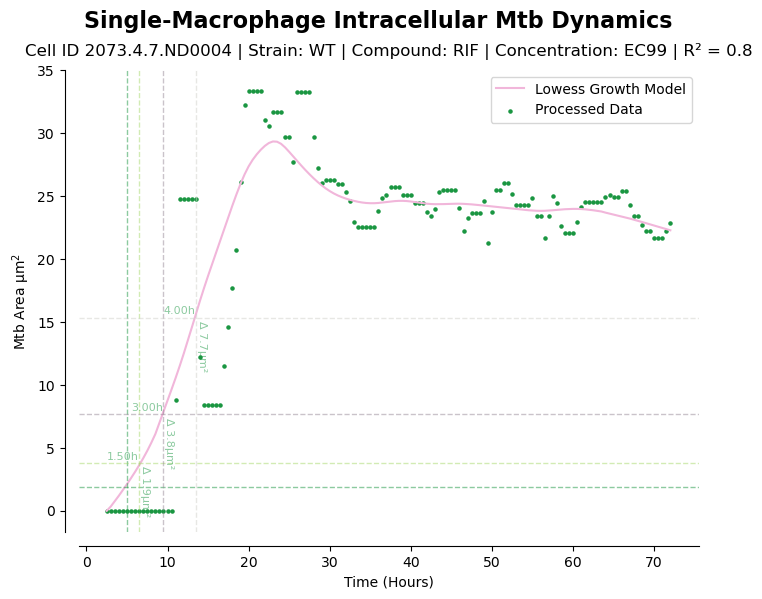

In [145]:
ID = '2073.4.7.ND0004'
# Get single-cell trajectory in df format
sc_df = df[df['ID'] == ID]
# Drop NaN values specifically from the required columns
sc_df = sc_df.dropna(subset=['Time Model (hours)', 'Mtb Area Model (µm)', 'Mtb Area Processed (µm)'])
# Ensure there is temporal order
sc_df = sc_df.sort_values(by='Time Model (hours)')
# Extract Strain, Compound, and Concentration for the title
strain, compound, concentration = sc_df[['Strain', 'Compound', 'Concentration']].iloc[0].values
# Calculate the R2 value and skip plotting if R2 < 0.7
r2 = round(r2_score(sc_df['Mtb Area Processed (µm)'], sc_df['Mtb Area Model (µm)']), 2)
df.loc[df['ID'] == ID, 'r2'] = r2
if r2 < 0.7:
    print(f'Nee fitting ({r2})')
# Find the temporal order of the minimum and maximum
min_value = max(sc_df['Mtb Area Model (µm)'].round(1).min(), 1.92) # has to be above the minimum threshold
max_value = sc_df['Mtb Area Model (µm)'].round(1).max()
# perform a check on the data
if max_value <= min_value:
    print(f'No population doubling for ID {ID}')
# Find the time indices of the minimum and maximum
min_index = sc_df['Mtb Area Model (µm)'].round(1).idxmin()
max_index = sc_df['Mtb Area Model (µm)'].round(1).idxmax()
# Check if maximum occurs before minimum
if max_index > min_index:
    growth = True
    # Minimum occurs before the maximum (indicating growth)
    # Start from the minimum and double
    N_i = min_value
    N_series = []
    # Generate the doubling series
    while N_i <= max_value:
        N_series.append(N_i)
        N_i *= 2
else:
    growth = False
    # non_doubling_curves.append(ID)
    print(f'No obvious growth for ID {ID}')
# Check if there are no valid doubling points
if len(N_series) < 2:
    print(f'No population doubling for ID {ID}')
    
# Find the indices and corresponding times for each doubling point
# doubling_time_indices = np.clip(np.searchsorted(sc_df['Mtb Area Model (µm)'], N_series), 0, len(sc_df) - 1) # old method
doubling_time_indices = [np.abs(sc_df['Mtb Area Model (µm)'] - value).idxmin() for value in N_series]
doubling_time_points = sc_df['Time Model (hours)'].loc[doubling_time_indices]
doubling_times = doubling_time_points.diff().dropna().values.tolist()
    
# Plot the experimental data and the fitted model
plt.figure(figsize=(8, 6))
plt.plot(sc_df['Time Model (hours)'], sc_df['Mtb Area Model (µm)'], label='Lowess Growth Model', color=colours[-2])
plt.scatter(sc_df['Time Model (hours)'], sc_df['Mtb Area Processed (µm)'], label='Processed Data', color=colours[0], s=5)

# Annotate doubling times and draw faint lines
for i, (time, population) in enumerate(zip(doubling_time_points, N_series)):
    time = abs(time)
    population = abs(population)
    color_index = i % len(expanded_piyg)  # This ensures the color index wraps around
    # Draw faint vertical lines at doubling time points
    plt.axvline(x=time, color=expanded_piyg[color_index], linestyle='--', linewidth=1, alpha=0.5)
    plt.axhline(y=population, color=expanded_piyg[color_index], linestyle='--', linewidth=1, alpha=0.5)
    
    # Place a text label indicating the doubling time
    if i > 0:  # Start labeling from the second point
        previous_time = doubling_time_points.iloc[i-1]
        
        # Midpoint between the two lines
        label_x_pos = time  # Correct the label position
        # Adjust y-position to place the label just above the horizontal line
        label_y_pos = population + (population * 0.01)  # Slightly above the horizontal line

        # Calculate the gap between the lines and scale the font size
        gap = time - previous_time
        scaled_fontsize = max(8, min(12, gap))  # Scale font size within a reasonable range (e.g., 8 to 12)
        
        # Draw the horizontal doubling time label
        plt.text(label_x_pos, label_y_pos, f'{abs(doubling_times[i-1]):.2f}h', 
                 ha='right', va='bottom', alpha=0.5, fontsize=scaled_fontsize, color=expanded_piyg[0])
        
        # Draw vertical arrow showing the change in N_series (doubling amount)
        deltaMtb = population - N_series[i-1]
        
        # Midpoint for the vertical delta annotation
        text_y_pos = (population + N_series[i-1]) / 2  # Midway between current and previous population
        text_x_pos = (population + N_series[i-1]) / 2  # Midway between current and previous population

        # Midpoint between the two lines
        label_x_pos = time + 0.1  # Adjust x-position
        # Adjust y-position to place the label just above the horizontal line
        label_y_pos = population - (max_value * 0.01)
        
        # Place the vertical label using plt.text
        plt.text(label_x_pos, label_y_pos, f'Δ {abs(deltaMtb):.1f}µm²',
                 fontsize=scaled_fontsize, color=expanded_piyg[0], ha='left', va='top', rotation=270, alpha=0.5)

# Add labels, legend, and titles
plt.xlabel('Time (Hours)')
plt.ylabel('Mtb Area µm$^{2}$')
plt.legend()
    # Main title
plt.suptitle('Single-Macrophage Intracellular Mtb Dynamics', 
             weight='bold', fontsize=16)
# Subtitle
plt.title(f'Cell ID {ID} | Strain: {strain} | Compound: {compound} | Concentration: {concentration} | R² = {r2}', fontsize=12, pad=10)

sns.despine(offset=10)
plt.grid(False)

In [49]:
N

0